In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oktayrdeki/heart-disease")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Francisco\.cache\kagglehub\datasets\oktayrdeki\heart-disease\versions\1


In [8]:
#df = pd.read_csv("./data/heart_disease.csv")

# Display first few rows
#print(df.head())


In [9]:
# All imports needed
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [10]:
# import pandas as pd
def load_data(file_path: str):
    """
    Returns a DataFrame object of the csv file passed in.

    :param file_path: String of the file path to load in

    :return: A DataFrame object of the csv data
    """
    assert(isinstance(file_path, str)), "File path must be a valid path"
    # file_path = "./data/heart_disease.csv"
    df = pd.read_csv(file_path)
    return df

In [3]:
def get_data_info(data_frame):
    """
    View the structure of the data frame

    :param data_frame: The data frame to get the structure of
    """
    assert(isinstance(data_frame, pd.DataFrame)), "The input must be DataFrame object"
    print("Summary of Dataset:")
    data_frame.info()
    print("Get missing count")
    data_frame.isnull().sum() 

In [4]:
def get_num_rows(data_frame):
    """
    Get number of rows of the data frame

    :param data_frame: The data frame to get the number of rows
    """
    assert(isinstance(data_frame, pd.DataFrame)), "The input must be DataFrame object"
    return data_frame.shape[0]

In [5]:
def classify_non_numerical_columns(data_frame):
    """
    Classification model that predicts the output of non-numerical
    data in the data frame for missing entries.

    :param data_Frame: The data_frame.

    :return: A new data frame with all of the classified columns.
    """
    assert(isinstance(data_frame, pd.DataFrame)), "The input must be DataFrame object"
    non_numeric_cols = data_frame.select_dtypes(exclude=['number']).columns
    for col in non_numeric_cols:
        label_encoder = LabelEncoder()
        data_frame[col] = label_encoder.fit_transform(data_frame[col])
    return data_frame

In [6]:
df = load_data("./data/heart_disease.csv")
print(classify_non_numerical_columns(df))

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
0     56.0       1           153.0              155.0                0   
1     69.0       0           146.0              286.0                0   
2     46.0       1           126.0              216.0                1   
3     32.0       0           122.0              293.0                0   
4     60.0       1           166.0              242.0                1   
...    ...     ...             ...                ...              ...   
9995  25.0       0           136.0              243.0                2   
9996  38.0       1           172.0              154.0                2   
9997  73.0       1           152.0              201.0                0   
9998  23.0       1           142.0              299.0                1   
9999  38.0       0           128.0              193.0                2   

      Smoking  Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0           1                 

In [38]:
def clean_data(data_frame):
    """ 
    Clean the data up from any missing values using KNN Imputer on
    numerical columns and Simple Imputer on non-numerical columns.
    Produces a cleaned data frame without missing entries. 

    :param data_frame: The data frame to clean up

    :return: The cleaned data frame
    """
    assert(isinstance(data_frame, pd.DataFrame)), "The input must be DataFrame object"

    # KNNImputer only works on numerical data
    # Apply to numerical columns with missing values
    numerical_cols = data_frame.select_dtypes(include=['number']).columns
    knn_imputer = KNNImputer(n_neighbors=5)
    data_frame[numerical_cols] = knn_imputer.fit_transform(data_frame[numerical_cols])

    # Apply SimpleImputer for non-numerical columns
    non_numerical_cols = data_frame.select_dtypes(exclude=['number']).columns
    mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    data_frame[non_numerical_cols] = mode_imputer.fit_transform(data_frame[non_numerical_cols])

    # TODO: Create a classifier pipeline for the non-numerical columns
    return data_frame

In [39]:
def main():
    """
    Main function to run complete data pipeline. Includes cleaning data,
    visualization, predictor.
    """
    df = load_data("./data/heart_disease.csv")
    print(f"Before cleaning: {get_num_rows(df)}")

    df_cleaned = clean_data(df)
    print(f"After cleaning: {get_num_rows(df_cleaned)}")

    duplicate_counts = df_cleaned.duplicated().sum()
    print(f"Duplicate rows: {duplicate_counts}")
main()

Before cleaning: 10000
After cleaning: 10000
Duplicate rows: 0


In [20]:
print(df.head(20))

     Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0   56.0       1           153.0              155.0                0        1   
1   69.0       0           146.0              286.0                0        0   
2   46.0       1           126.0              216.0                1        0   
3   32.0       0           122.0              293.0                0        1   
4   60.0       1           166.0              242.0                1        1   
5   25.0       1           152.0              257.0                1        1   
6   78.0       0           121.0              175.0                0        1   
7   38.0       0           161.0              187.0                1        1   
8   56.0       0           135.0              291.0                1        0   
9   75.0       1           144.0              252.0                1        1   
10  36.0       0           179.0              191.0                0        0   
11  40.0       0           1

In [22]:
class_columns = {'Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'High LDL Cholesterol', 'Low HDL Cholesterol'}
label_columns = {'Heart Disease Status'}
continuous_columns = set(df.columns) - label_columns - class_columns
df.columns, continuous_columns, label_columns, class_columns

(Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
        'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
        'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
        'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
        'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
        'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
       dtype='object'),
 {'Age',
  'Alcohol Consumption',
  'BMI',
  'Blood Pressure',
  'CRP Level',
  'Cholesterol Level',
  'Fasting Blood Sugar',
  'Homocysteine Level',
  'Sleep Hours',
  'Stress Level',
  'Sugar Consumption',
  'Triglyceride Level'},
 {'Heart Disease Status'},
 {'Diabetes',
  'Exercise Habits',
  'Family Heart Disease',
  'Gender',
  'High Blood Pressure',
  'High LDL Cholesterol',
  'Low HDL Cholesterol',
  'Smoking'})

In [27]:
label_encoders = {}
for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use

X = df.drop(columns=label_columns)  # Replace with actual target column
y = df[list(label_columns)]
scaler = StandardScaler()
X.iloc[:, :] = scaler.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',  # Evaluation metric for binary classification
    'max_depth': 5,  # Maximum depth of trees
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,  # Fraction of data used per tree
    'colsample_bytree': 0.8,  # Fraction of features used per tree
    'random_state': 42
}

evals = [(dtrain, 'train'), (dvalid, 'valid')]

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,  # Stops if validation loss doesn't improve
    verbose_eval=50
)


[0]	train-logloss:0.50132	valid-logloss:0.50328


/tmp/ipykernel_99250/2280308989.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.98437978 -1.00065708  0.98437978 ...  0.98437978  0.98437978
 -1.00065708]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :] = scaler.fit_transform(X)
/tmp/ipykernel_99250/2280308989.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.21353483e+00 -1.21353483e+00 -1.21232250e-03 ... -1.21353483e+00
 -1.21232250e-03  1.21111018e+00]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, :] = scaler.fit_transform(X)
/tmp/ipykernel_99250/2280308989.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.95644989 -1.02500834 -1.02500834 ...  0.95644989  0.95644989
  0.95644989]' has dtype

[50]	train-logloss:0.43059	valid-logloss:0.50136
[76]	train-logloss:0.40261	valid-logloss:0.50536


In [28]:
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary values

# Print Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.798
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1200
           1       0.00      0.00      0.00       300

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.64      0.80      0.71      1500



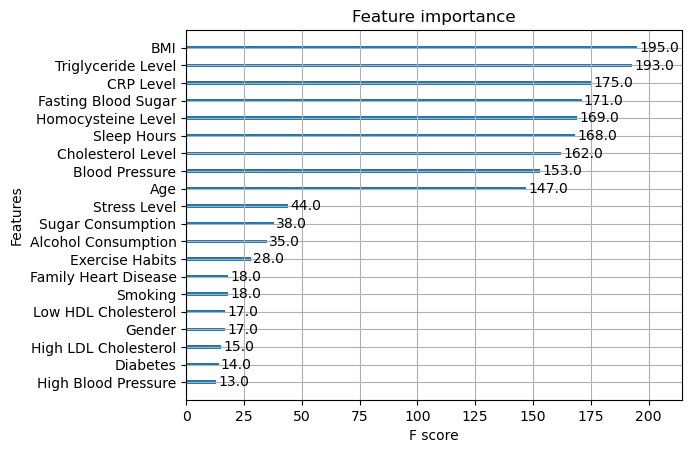

In [29]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()